Ways to handle missing data:
1) Remove them (not preferable as the entire row is removed)
2) Impute them (fill some values of your own)

Two ways of imputing:
1) Univariate
2) Multivariate

Removing missing values is called CCA (Complete Case Analysis)

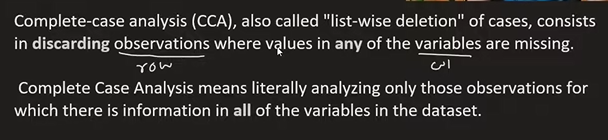

Assumptions for CCA:
1) Your data is missing completely at random. This is because we want to maintain the distribution

MCAR=Missing Completely At Random

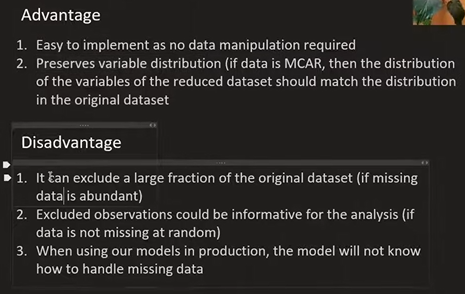

You do not apply CCA when the column has more than 5% of missing data